In [2]:
# Import Important Libraries
import pandas as pd
import numpy as np
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Raw DataFile
TradeVariablesfile = r'KORBAT Bactest SRFC03T10 backtest trade list from Amibroker merged data.csv'

In [4]:
# Call to Read Data and get it in usable format, remove extra columns etc

class PredictionModel(object):
    
    def __init__(self, name = 'KORBAT SRFCT03T10', datafile = TradeVariablesfile ):    
        self.name = name
        self.datafile = datafile
        
    def Read_data (self):
        data = pd.read_csv(self.datafile)
        data.Date = pd.to_datetime(data.Date, format = "%Y-%m-%d %H:%M:%S")
        data['Ex.date'] = pd.to_datetime(data['Ex.date'], format = "%Y-%m-%d %H:%M:%S")
        data['Longs'] = data.Trade.str.split().str[0]
        data['SL']= data.Trade.str.split().str[-1]
        data.SL.replace('loss)', 'SLHit', inplace = 1)
        data.SL.replace(['(profit)', 'Long', 'Short'], 'SL_Not_Hit', inplace = 1)
        data = data.join(pd.get_dummies(data.Longs))
        data = data.join(pd.get_dummies(data.SL))
        data.drop(['Longs', 'SL', 'SL_Not_Hit', 'Short'], axis =1 ,inplace =1)
        self.raw_data = data
        varcolumns = ['%Profit', 'Volmult', 'ATR1', 'ATRTrend',
       'CloseCurrent', 'GapOpen', 'GapCurrent', 'GapTotal', 'GapAligned',
       'GapRatio', 'GapVol', 'TEMATrendYestClose', 'TEMAStrengthYest',
       'TemaTrendlength', 'TemaDivergence', 'TemaTrendDaily', 'NiftyATR1',
       'NiftyATRTrend', 'NiftyCloseCurrent', 'NiftyGapOpen', 'NiftyGapCurrent',
       'NiftyGapTotal', 'NiftyGapAligned', 'NiftyGapRatio', 'NiftyGapVol',
       'NiftyTEMATrendYestClose', 'NiftyTEMAStrengthYest',
       'NiftyTemaTrendlength', 'NiftyTemaDivergence', 'NiftyTemaTrendDaily',
       'TradeCount', 'LongRatio', 'Long', 'SLHit']           
        data = data[varcolumns]
        data.rename (columns = {'%Profit' : 'Profit'}, inplace =1)
        self.data = data       
        return self.data
    
    def Daily_data (self):
#         Add the Date columns in data
        varcolumns = ['Date', '%Profit', 'Volmult', 'ATR1', 'ATRTrend',
       'CloseCurrent', 'GapOpen', 'GapCurrent', 'GapTotal', 'GapAligned',
       'GapRatio', 'GapVol', 'TEMATrendYestClose', 'TEMAStrengthYest',
       'TemaTrendlength', 'TemaDivergence', 'TemaTrendDaily', 'NiftyATR1',
       'NiftyATRTrend', 'NiftyCloseCurrent', 'NiftyGapOpen', 'NiftyGapCurrent',
       'NiftyGapTotal', 'NiftyGapAligned', 'NiftyGapRatio', 'NiftyGapVol',
       'NiftyTEMATrendYestClose', 'NiftyTEMAStrengthYest',
       'NiftyTemaTrendlength', 'NiftyTemaDivergence', 'NiftyTemaTrendDaily',
       'TradeCount', 'LongRatio', 'Long', 'SLHit']  
        data = self.raw_data[varcolumns]
        data.rename (columns = {'%Profit' : 'Profit'}, inplace =1)
        self.dailydata = data
        return data
    
    def Daily_aggregates (self):
#         Calculate daily aggregates
        daily1 = pd.DataFrame({})
        daily = self.dailydata
        daily1['Profit'] = daily.groupby('Date').Profit.sum()
        daily1['TradeCount'] = daily.groupby('Date').TradeCount.first()
        daily1['LongRatio'] = daily.groupby('Date').LongRatio.first()
        daily1['Profitable'] = np.where(daily1.Profit > 0, 1, 0)
        Niftycols = [item for item in daily.columns if item.startswith('Nifty')]
        daily1[Niftycols] = daily.groupby('Date')[Niftycols].first()
        self.dailyaggregate = daily1
        return daily1

In [5]:
# Read Data

Predictor = PredictionModel()
data = Predictor.Read_data()
Predictor.Daily_data()
daily1 = Predictor.Daily_aggregates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9796 entries, 0 to 9795
Data columns (total 34 columns):
Profit                     9796 non-null float64
Volmult                    9796 non-null float64
ATR1                       9796 non-null float64
ATRTrend                   9788 non-null float64
CloseCurrent               9796 non-null float64
GapOpen                    9796 non-null float64
GapCurrent                 9796 non-null float64
GapTotal                   9796 non-null float64
GapAligned                 9796 non-null int64
GapRatio                   9796 non-null float64
GapVol                     9796 non-null float64
TEMATrendYestClose         9796 non-null float64
TEMAStrengthYest           9796 non-null float64
TemaTrendlength            9796 non-null int64
TemaDivergence             9796 non-null float64
TemaTrendDaily             9796 non-null float64
NiftyATR1                  9796 non-null float64
NiftyATRTrend              9796 non-null float64
NiftyCloseCurre

D:\Filehistory Backup D\WinPython-64bit-3.5.2.2\python-3.5.2.amd64\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [6]:
data.iloc[0]

Profit                     -0.008400
Volmult                    11.236485
ATR1                        0.003806
ATRTrend                    1.033005
CloseCurrent                0.763360
GapOpen                     0.016057
GapCurrent                  0.008850
GapTotal                    0.024906
GapAligned                  1.000000
GapRatio                    0.551150
GapVol                      4.218244
TEMATrendYestClose         -0.000152
TEMAStrengthYest           -0.000986
TemaTrendlength             7.000000
TemaDivergence              0.016785
TemaTrendDaily              0.005616
NiftyATR1                   0.001440
NiftyATRTrend               0.887971
NiftyCloseCurrent           0.214305
NiftyGapOpen                0.008086
NiftyGapCurrent            -0.000186
NiftyGapTotal               0.007900
NiftyGapAligned             0.000000
NiftyGapRatio              -0.023030
NiftyGapVol                 5.615455
NiftyTEMATrendYestClose    -0.000425
NiftyTEMAStrengthYest      -0.001279
N

In [7]:
# function to create the Correlation matrix and plot it
def Plot_CorrelationMatrix(df):

    corr_df = df.corr(method = 'pearson')

    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = True
    # Create the heatmap using seaborn library. 
    # List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
    sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
    # Show the plot we reorient the labels for each column and row to make them easier to read.
    plt.yticks(rotation=0) 
    plt.xticks(rotation=90) 
    return

In [8]:
def Plot_scattermatrix(df, col_num = 4, yaxis = "Profit"):
    row_num = int(len(df.columns)/col_num) + 1
    f, ax1= plt.subplots(row_num, col_num, sharey = True,figsize = (5 * col_num, 5 * row_num) )
    count = 0
    for i in np.arange(row_num):
        for j in np.arange(col_num):
            try: 
                sns.set_context(font_scale = 10)
                sns.regplot(df[df.columns[count]], df[yaxis], ax = ax1[i,j])
                count = count + 1
            except IndexError:
                pass
    plt.subplots_adjust(left = 0.01, right = .99, bottom = 0.12, top = 0.90,
                                wspace = .20, hspace = .12)  

    return 

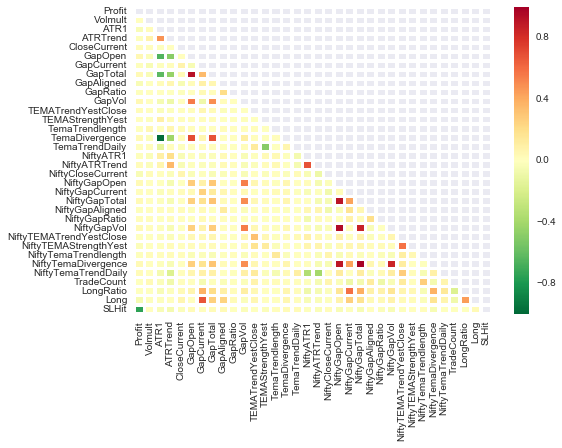

In [10]:
# Lets start with correlation matrix and see if there is some relationships to be harnsessed
Plot_CorrelationMatrix(data)
plt.show()

In [ ]:
# The two variable which could be considered dependent are Profit and SLHit. Unfortunately for both of them we dont 
# find any siginficant correaltion with any other variables. Damn!

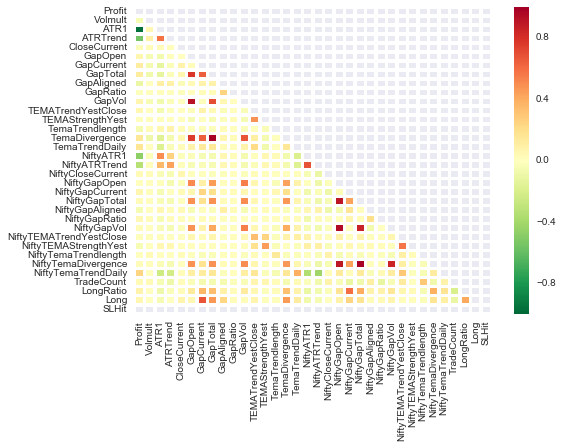

In [11]:
# Lets try this plot again only for entries where SLHit = 1 and see if that subset uncovers any relationships
# create the Correlation matrix and plot it
Plot_CorrelationMatrix(data[data.SLHit == 1])
plt.show()

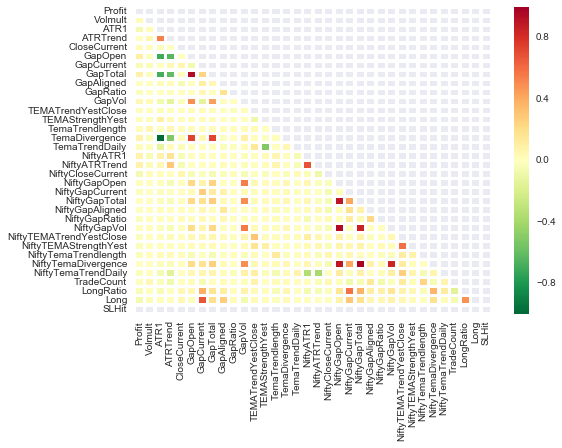

In [12]:
# Lets try this plot again only for entries where SLHit = 0 and see if that subset uncovers any relationships
# create the Correlation matrix and plot it
Plot_CorrelationMatrix(data[data.SLHit == 0])
plt.show()

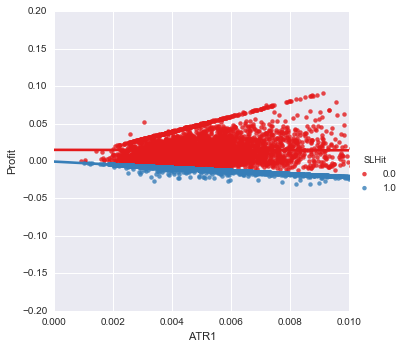

In [20]:
# ATR1 correlation with Profit in case SLHit == 1 seems to be a but high on the -ve side. Means means when SL is hit, 
# profit is -ve and final value depends upon ATR.

# Lets see the scatterplot of ATR1 with Profit
g = sns.lmplot(x='ATR1', y="Profit", hue = 'SLHit', data= data, palette = 'Set1')
g = g.set(xlim=(0, 0.01)
          , ylim = (-0.2, 0.2))
plt.show()

In [ ]:
# Lets not read too much into it. it is expected. When SL is getting hit, a trade with high ATR will like see higher losses.
# More important message us that ATR1 levels dont seem to say anything about final Profit.

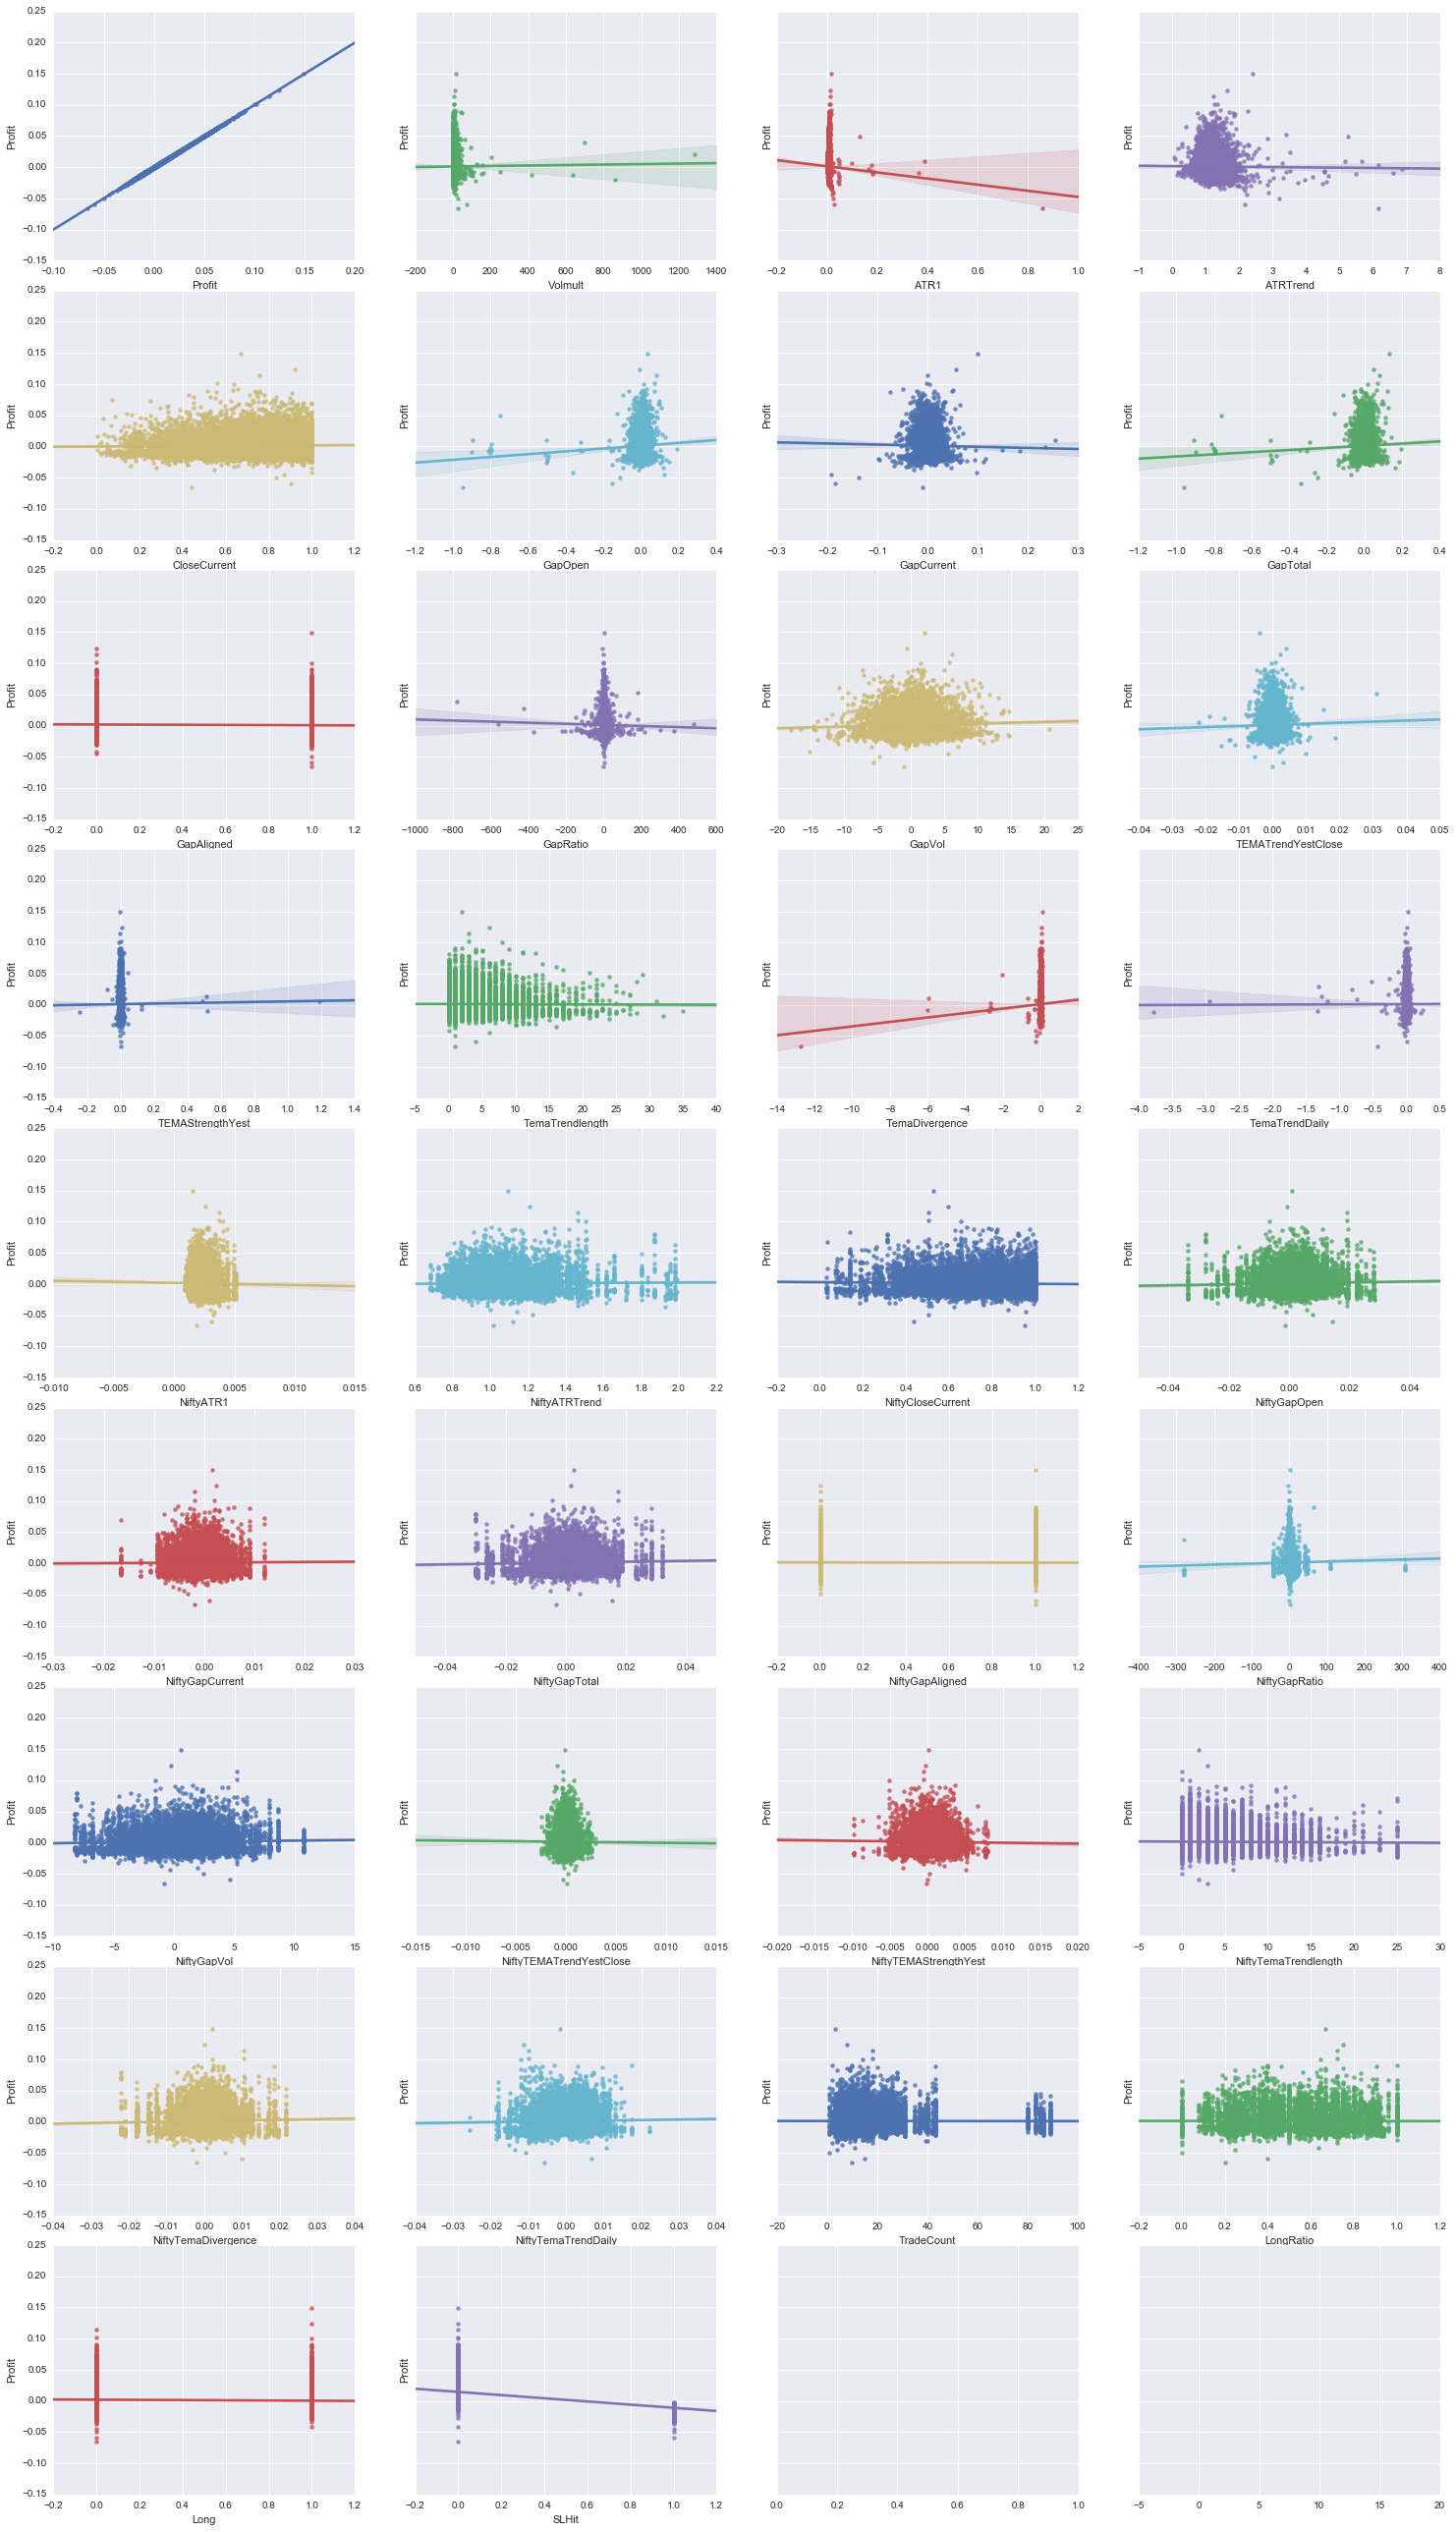

In [24]:
# Lets try scatterplot with Profit as y-axis
Plot_scattermatrix(data, 4, "Profit")
plt.show()

In [ ]:
# Cant find any relationship of interest here

In [25]:
# lets try another tack, lets see if we can get aggregated data for a day and if there are any relationships there.
# Nifty50 values are used here as index is same for all trades for a given day.
daily1 = Predictor.Daily_aggregates()

In [26]:
daily1.iloc[1]

Profit                      0.062200
TradeCount                 18.000000
LongRatio                   0.777778
Profitable                  1.000000
NiftyATR1                   0.001351
NiftyATRTrend               0.854570
NiftyCloseCurrent           0.784054
NiftyGapOpen                0.002949
NiftyGapCurrent            -0.000073
NiftyGapTotal               0.002876
NiftyGapAligned             0.000000
NiftyGapRatio              -0.024731
NiftyGapVol                 2.182860
NiftyTEMATrendYestClose    -0.000300
NiftyTEMAStrengthYest      -0.000914
NiftyTemaTrendlength        5.000000
NiftyTemaDivergence         0.001901
NiftyTemaTrendDaily         0.005462
Name: 2011-01-04 09:25:00, dtype: float64

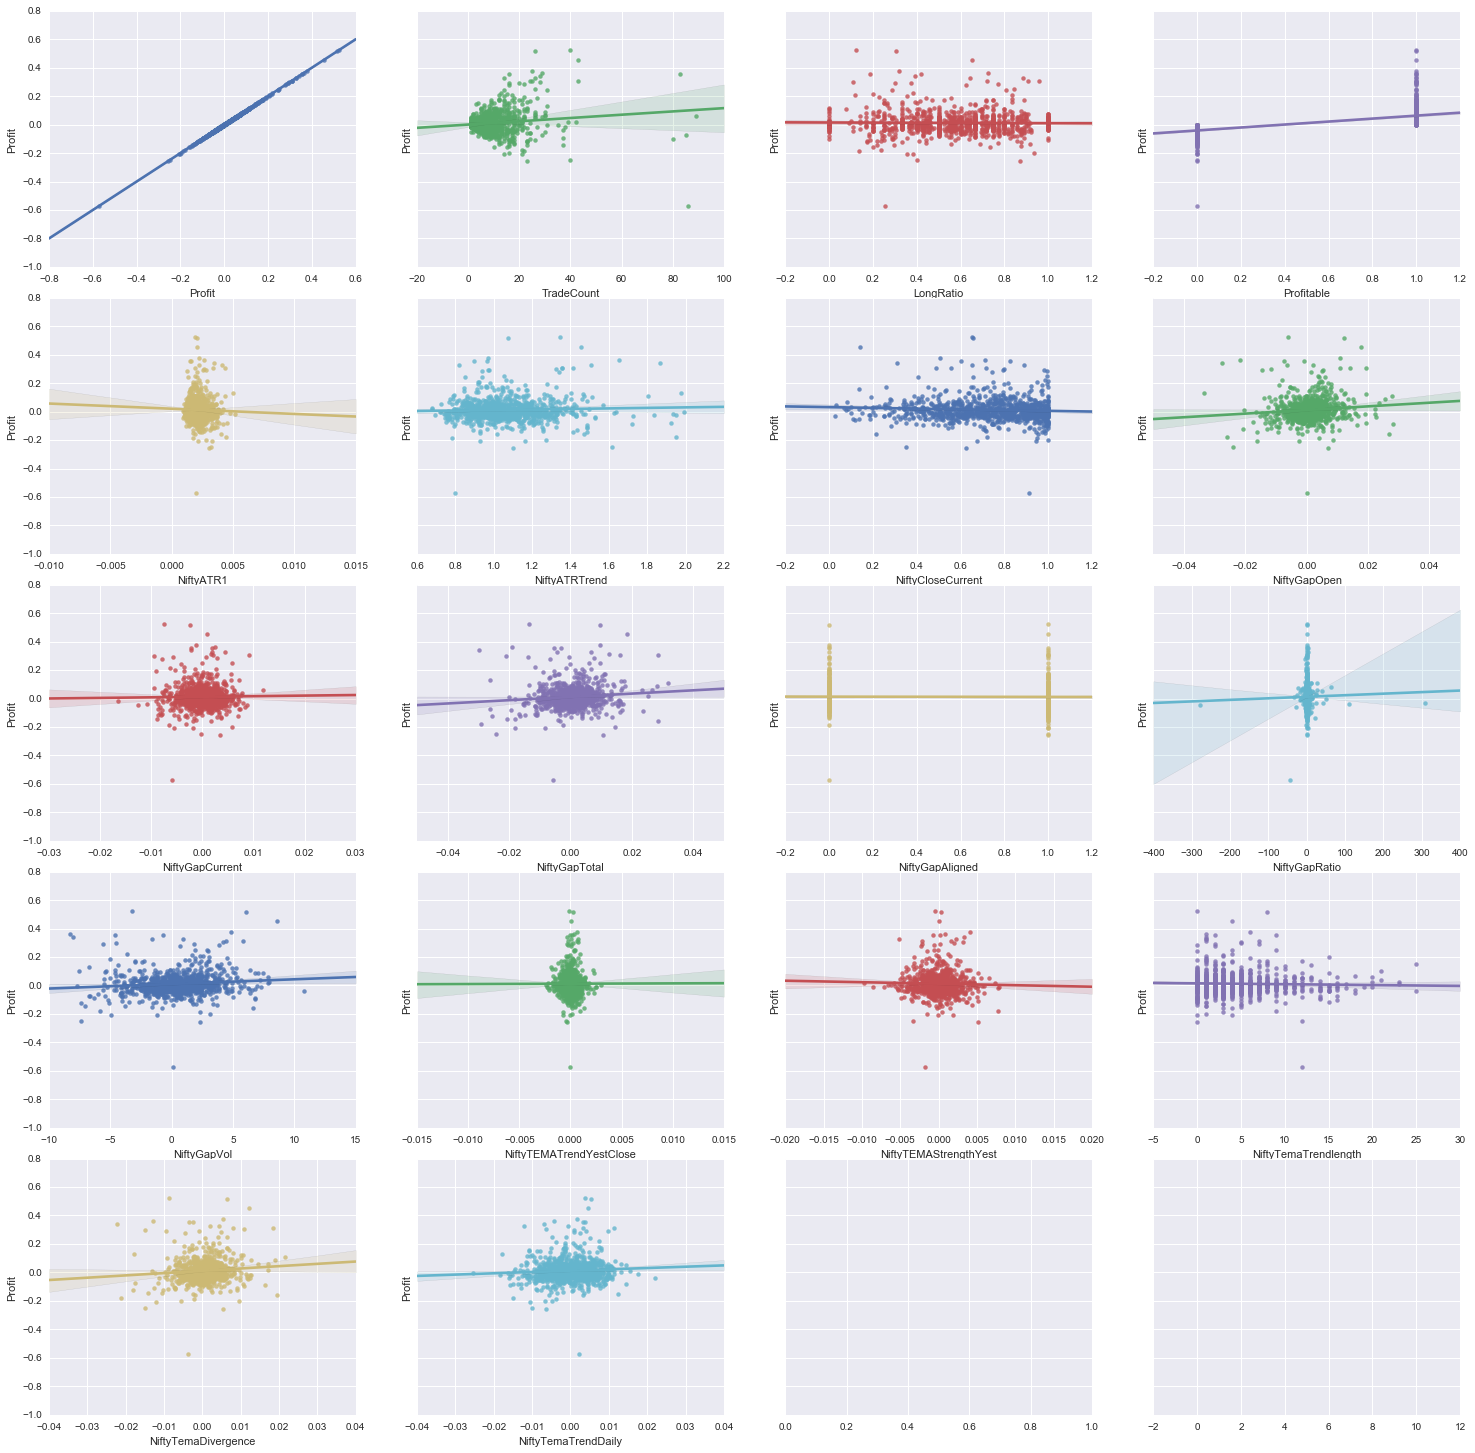

In [31]:
Plot_scattermatrix(daily1, 4, "Profit")
plt.show()

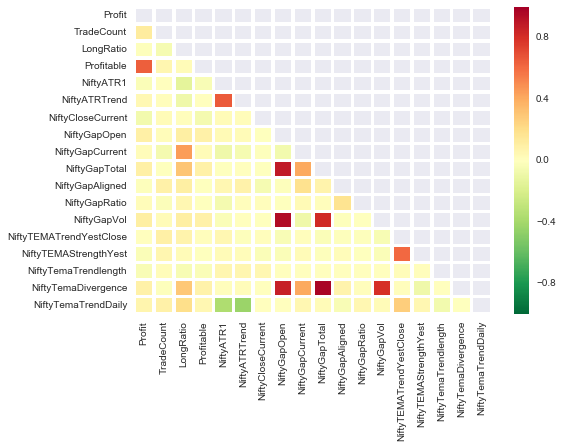

In [30]:
# Again nothing significant unearthed.
# While we are at it, lets try correlation matrix as well
Plot_CorrelationMatrix(daily1)
plt.show()

In [ ]:
# Unfortunately no clear relationship here as well.

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

In [137]:
# Random forest classfier on tradewise data
Y_train = np.asarray(np.where(data.Profit>0,1,0), dtype="float64")
train = data[data.columns[1:-1]]
train.fillna(0, inplace = 1)
for i in np.arange(1,10):
    rf  = RandomForestClassifier(max_depth = i, n_estimators= 500, max_features = 10, min_samples_leaf = 500, n_jobs = -1)
    scores = cross_validation.cross_val_score(rf,train,Y_train)
    print (i)
    print (scores.mean())
    
# Finding features importance for the last one    
rf.fit(train, Y_train)
print (sorted(zip(rf.feature_importances_, train.columns), reverse = True))


D:\Filehistory Backup D\WinPython-64bit-3.5.2.2\python-3.5.2.amd64\lib\site-packages\pandas\core\frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


1
0.593711726883
2
0.593711726883
3
0.593507415979
4
0.593813788528
5
0.594528220045
6
0.594017911819
7
0.594630969606
8
0.594222097647
9
0.593915850174
[(0.1039703272275932, 'GapCurrent'), (0.10226840252801037, 'GapVol'), (0.096366756721286362, 'GapOpen'), (0.067833618877540136, 'NiftyGapOpen'), (0.05994369674615932, 'NiftyCloseCurrent'), (0.047167519411937989, 'NiftyTemaTrendDaily'), (0.044746030936765907, 'TemaDivergence'), (0.044459594193177139, 'NiftyGapVol'), (0.042433731484142166, 'GapTotal'), (0.038189150245965302, 'GapRatio'), (0.036699677322104704, 'NiftyGapTotal'), (0.032723455392532699, 'Long'), (0.030831284516496926, 'LongRatio'), (0.030304156087955746, 'NiftyTemaDivergence'), (0.026085633914563845, 'NiftyATR1'), (0.023031693958648236, 'NiftyATRTrend'), (0.021376644959315516, 'TEMATrendYestClose'), (0.018859482536709989, 'NiftyGapCurrent'), (0.018237110107081532, 'TradeCount'), (0.014451585804948049, 'NiftyGapRatio'), (0.013457738928905049, 'NiftyTEMAStrengthYest'), (0.013

In [138]:
# Poor success!
# Lets try Random Forest classifier on Daily Aggregated data

Y_train = np.asarray(daily1.Profitable, dtype="float64")
Predictors = ['TradeCount', 'LongRatio', 'NiftyATR1',
       'NiftyATRTrend', 'NiftyCloseCurrent', 'NiftyGapOpen', 'NiftyGapCurrent',
       'NiftyGapTotal', 'NiftyGapAligned', 'NiftyGapRatio', 'NiftyGapVol',
       'NiftyTEMATrendYestClose', 'NiftyTEMAStrengthYest',
       'NiftyTemaTrendlength', 'NiftyTemaDivergence', 'NiftyTemaTrendDaily']
for i in np.arange(1,10):
    rf1  = RandomForestClassifier(max_depth = i,n_estimators= 100, max_features = 8, min_samples_leaf = 10, n_jobs = -1 )
    scores = cross_validation.cross_val_score(rf1,daily1[Predictors],Y_train)
    print (i)
    print (scores.mean())
    
# Finding features importance for the last one    
rf1.fit(daily1[Predictors], Y_train)
sorted(zip(rf.feature_importances_, daily1[Predictors].columns), reverse = True)


1
0.517955930614
2
0.510545174469
3
0.518987341772
4
0.50422275802
5
0.536976759762
6
0.525339896859
7
0.520065635256
8
0.526418190342
9
0.49681869935


[(0.1039703272275932, 'NiftyGapOpen'),
 (0.10226840252801037, 'NiftyGapRatio'),
 (0.096366756721286362, 'NiftyCloseCurrent'),
 (0.044746030936765907, 'NiftyTemaTrendlength'),
 (0.042433731484142166, 'NiftyGapCurrent'),
 (0.038189150245965302, 'NiftyGapAligned'),
 (0.026085633914563845, 'NiftyTemaTrendDaily'),
 (0.021376644959315516, 'NiftyGapVol'),
 (0.013071700349271489, 'NiftyATRTrend'),
 (0.010870863168135235, 'LongRatio'),
 (0.010474729416274512, 'NiftyTemaDivergence'),
 (0.010075625806911407, 'NiftyTEMATrendYestClose'),
 (0.0099056650988597877, 'NiftyATR1'),
 (0.0069739997662879132, 'NiftyGapTotal'),
 (0.0046995916826222265, 'TradeCount'),
 (0.0016265343249431683, 'NiftyTEMAStrengthYest')]

In [139]:
# Lets try the Logistic Regression on the trade wise data

from sklearn.linear_model import LogisticRegression
Y_train = np.asarray(np.where(data.Profit>0,1,0), dtype="float64")
train = data[data.columns[1:-1]]
train.fillna(0, inplace = 1)

lr  = LogisticRegression()
lr.fit(train, Y_train)
scores = cross_validation.cross_val_score(lr,train,Y_train)
print ("Mean Scores from cross validation is %f"%scores.mean())
dict(zip(data.columns.values, lr.coef_[0]))
print ("\nThe coefficents are : ")
dict(zip(data.columns.values, lr.coef_[0]))



D:\Filehistory Backup D\WinPython-64bit-3.5.2.2\python-3.5.2.amd64\lib\site-packages\pandas\core\frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Mean Scores from cross validation is 0.586872

The coefficents are : 


{'ATR1': 0.09871514356415699,
 'ATRTrend': 0.20714366822003866,
 'CloseCurrent': 0.41506067838250155,
 'GapAligned': -0.00064782485067633501,
 'GapCurrent': 0.24478366268554472,
 'GapOpen': -0.17027645266692104,
 'GapRatio': 0.0073923027157916221,
 'GapTotal': -0.05943625824854093,
 'GapVol': 0.072677559721527396,
 'LongRatio': -0.24553820563132334,
 'NiftyATR1': 0.22380995561883868,
 'NiftyATRTrend': -0.19930598007838038,
 'NiftyCloseCurrent': -0.077767861973891989,
 'NiftyGapAligned': 0.0024699722702644085,
 'NiftyGapCurrent': 0.11169964932292184,
 'NiftyGapOpen': 0.18946771745151975,
 'NiftyGapRatio': 0.024417339652352169,
 'NiftyGapTotal': -0.02988156641114385,
 'NiftyGapVol': 0.014548712732892974,
 'NiftyTEMAStrengthYest': -0.0085300814505576677,
 'NiftyTEMATrendYestClose': -0.11342549462778861,
 'NiftyTemaDivergence': 0.54497443844281845,
 'NiftyTemaTrendDaily': 0.0015749638400105702,
 'NiftyTemaTrendlength': 0.065766240099307913,
 'Profit': -4.8102774090576762e-05,
 'TEMAStrengt

In [140]:
# Lets try the Logistic Regression on the daily aggregate data

from sklearn.linear_model import LogisticRegression

Y_train = np.asarray(daily1.Profitable, dtype="float64")
Predictors = ['TradeCount', 'LongRatio', 'NiftyATR1',
       'NiftyATRTrend', 'NiftyCloseCurrent', 'NiftyGapOpen', 'NiftyGapCurrent',
       'NiftyGapTotal', 'NiftyGapAligned', 'NiftyGapRatio', 'NiftyGapVol',
       'NiftyTEMATrendYestClose', 'NiftyTEMAStrengthYest',
       'NiftyTemaTrendlength', 'NiftyTemaDivergence', 'NiftyTemaTrendDaily']
lr2  = LogisticRegression()
lr2.fit(daily1[Predictors], Y_train)
scores = cross_validation.cross_val_score(lr2,daily1[Predictors],Y_train)
print ("Mean Scores from cross validation is %f"%scores.mean())
print ("\nThe coefficents are : ")
dict(zip(daily1[Predictors].columns.values, lr2.coef_[0]))



Mean Scores from cross validation is 0.527470

The coefficents are : 


{'LongRatio': 0.19560933255043206,
 'NiftyATR1': -0.008579996260594443,
 'NiftyATRTrend': 0.078586204508586666,
 'NiftyCloseCurrent': -0.49849430217293517,
 'NiftyGapAligned': -0.059668729959645075,
 'NiftyGapCurrent': 0.042745199325750327,
 'NiftyGapOpen': -0.00058355140042526572,
 'NiftyGapRatio': 0.00011647496137509947,
 'NiftyGapTotal': 0.042161491674943888,
 'NiftyGapVol': 0.069562815553524032,
 'NiftyTEMAStrengthYest': -0.0056139076423571523,
 'NiftyTEMATrendYestClose': 0.0037121789732591781,
 'NiftyTemaDivergence': 0.015265329704017006,
 'NiftyTemaTrendDaily': 0.11989256105128937,
 'NiftyTemaTrendlength': -0.010385658892983114,
 'TradeCount': 0.014203876418941599}